# DPD simulation of diblock copolymer

**`By You-Liang Zhu`**

## Introduction

This tutorial provides an introduction of DPD simulations of diblock copolymer. It is suitable for new users who want to learn about how to run DPD simulations. It does however assume that you have a machine with PYGAMD correctly installed.

In this tutorial, we would like to make a system consisting of diblock copolymers to study the phase separation.

**Download [running files](https://github.com/youliangzhu/pygamd-v1/tree/main/examples/Case1-DPD/diblock-copolymer/systems/A5B5)**.

In order to run this DPD simulation with PYGAMD, two files should be prepared:
*  `mst`: file that describes all the information (including position, velocity, topology, etc.) of the particles. More about [MST data format](https://pygamd-v1.readthedocs.io/en/latest/system-data-format.html). The mst configuration file could be generated by [`molgen`](https://pygamd-v1.readthedocs.io/en/latest/molgen.html) plugin
*  `gala`: file that describes the settings for the PYGAMD simulation engine.

## Prepare MST file

A system containing A5B5 diblock copolymer molecules need to be built for simulation.
In order to build the system, a python script of [`molgen`](https://pygamd-v1.readthedocs.io/en/latest/molgen.html) that will call the [`molgen`](https://pygamd-v1.readthedocs.io/en/latest/molgen.html) plugin of PYGAMD is needed.
The coarse-grained model of diblock copolymer is given: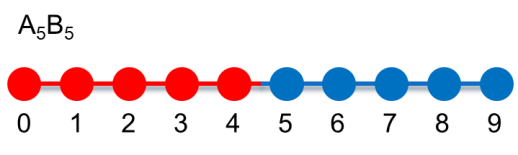

The [`molgen`](https://pygamd-v1.readthedocs.io/en/latest/molgen.html) script "A5B5.molg" for randomly generating A5B5 diclock copolymers is given:

In [ ]:
import molgen

mol1=molgen.Molecule(10)#particle number
mol1.setParticleTypes("A,A,A,A,A,B,B,B,B,B")#type
mol1.setTopology("0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9")#topology
mol1.setBondLength(0.75)#bond length
mol1.setMass(1.0)#mass


gen=molgen.Generators(20,20,20) # box size in x, y, and z direction
gen.addMolecule(mol1,2400)#molecule, the number of molecules
gen.outPutMST("A5B5") #file name

## Prepare JUGA input file

What the simulation need next is the JUGA file "A5B5-dpd.juga" that define the program settings for DPD run. 

In [ ]:
import pygamd

mst = pygamd.snapshot.read("A5B5.mst")
app = pygamd.application.dynamics(info=mst, dt=0.04)

fn = pygamd.force.dpd(info=mst, rcut=1.0)
fn.setParams(type_i="A", type_j="A", alpha=25.0, sigma=3.0)
fn.setParams(type_i="A", type_j="B", alpha=40.0, sigma=3.0)
fn.setParams(type_i="B", type_j="B", alpha=25.0, sigma=3.0)
app.add(fn)

fb = pygamd.force.bond(info=mst, func='harmonic')
fb.setParams(bond_type = 'A-A', param=[4.0, 0.0])#param=[k, r0]
fb.setParams(bond_type = 'A-B', param=[4.0, 0.0])#param=[k, r0]
fb.setParams(bond_type = 'B-B', param=[4.0, 0.0])#param=[k, r0]
app.add(fb)

gw = pygamd.integration.gwvv(info=mst, group='all')
app.add(gw)


di = pygamd.dump.data(info=mst, group='all', file='data.log', period=500)
app.add(di)

dm = pygamd.dump.mst(info=mst, group='all', file='p.mst', period=100000)
app.add(dm)

#ready ro run
app.run(500000)#(the number of steps to run)